In [1]:
# Imports
%matplotlib inline

import os
import numpy as np
import pandas as pd
import numpy.random as rand
from itertools import islice
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier,
                             RandomForestRegressor)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
import math
import sklearn.datasets as datasets
# import sklearn.cross_validation as cv
import sklearn.model_selection as cv
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import log_loss, make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

plt.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)

In [44]:
def score_matrix(obj):
    name = str(obj.__class__).split(".")[-1][:-2]
    score = obj.score(X_test,y_test)
    y_pred = obj.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    precision = tp / (tp +fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
#     print("Model: {}".format(name))
#     print("precision = {:.2%}".format(precision))
#     print("recall = {:.2%}".format(recall))
#     print('accuracy = {:.2%}, score = {:.2%}'.format(accuracy,score))
    return score

In [3]:
def clean_churn_data(churn_df):
    cutoff = churn_df.last_trip_date.max() + datetime.timedelta(-30)
    churn_df['active_status'] = (churn_df.last_trip_date > cutoff).astype(int)
    churn_df['city'] = churn_df['city'].map({'Astapor':0,'King’s Landing':1,'Winterfell':2})
    churn_df['city'] = churn_df['city'].apply(lambda x: x if x>=0 and x <=2 else 3)
    churn_df['phone'] = churn_df['phone'].map({'Android':0,'iPhone':1})
    churn_df['phone'] = churn_df['phone'].apply(lambda x: int(x) if x>=0 and x <=1 else int(2))
#     churn_df['signup_year'] = churn_df['signup_date'].apply(lambda x: x.year)
#     churn_df['signup_month'] = churn_df['signup_date'].apply(lambda x: x.month)
#     churn_df['signup_dayofweek'] = churn_df['signup_date'].apply(lambda x: x.dayofweek)
    churn_df = churn_df.drop(['signup_date', 'last_trip_date'], axis=1)
    churn_df['avg_rating_of_driver'] = churn_df['avg_rating_of_driver'].fillna(0)
    churn_df['avg_rating_by_driver'] = churn_df['avg_rating_by_driver'].fillna(0)
    return churn_df

In [55]:
churn_df = pd.read_csv('data/churn_train.csv', parse_dates=['last_trip_date','signup_date'])
churn_df = clean_churn_data(churn_df)

In [56]:
y = churn_df['active_status']
X = churn_df.drop(columns=['active_status'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=.74, max_features=4, max_depth=2, random_state =1)
gb_clf.fit(X_train, y_train)
score_matrix(gb_clf)

0.7995

In [6]:
# # Create categorical value for missing column avg_rating_by_driver
# bin_rating_by_drivers = pd.cut(churn_df['avg_rating_by_driver'], 3, labels=['A', 'B', 'C'])
# #bin_rating_of_users.fillna('D', inplace=True)
# bin_rating_by_drivers = bin_rating_by_drivers.cat.add_categories("D").fillna("D")

In [272]:
# bin_rating_of_drivers = pd.cut(churn_df['avg_rating_of_driver'], 3, labels=['A', 'B', 'C'])
# #bin_rating_of_users.fillna('D', inplace=True)
# bin_rating_of_drivers = bin_rating_of_drivers.cat.add_categories("D").fillna("D")

In [254]:
# from sklearn.preprocessing import label_binarize
# label_binarize(bin_rating_by_drivers, classes=['A', 'B', 'C', 'D'])
# label_binarize(bin_rating_of_drivers, classes=['A', 'B', 'C', 'D'])

In [273]:
# churn_df["avg_rating_of_driver"] = bin_rating_of_drivers.values

In [274]:
# churn_df["avg_rating_of_driver"] = churn_df["avg_rating_of_driver"].map({"A":0,"B":1,"C":2,"D":3})

In [11]:
churn_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active_status
0,6.94,5.0,5.0,1.00,0.0,0,0.0,0,False,100.0,0
1,8.06,5.0,5.0,1.00,0.0,0,0.0,2,True,0.0,0
2,21.50,4.0,0.0,1.00,2.0,1,0.0,1,True,100.0,0
3,9.46,5.0,0.0,2.75,2.0,0,100.0,1,False,100.0,0
4,13.77,5.0,0.0,1.00,2.0,1,0.0,0,False,100.0,0


In [89]:
#churn_df = pd.read_csv('Data/churn_train.csv', parse_dates=['last_trip_date','signup_date'])
# churn_df['active_status'] = churn_df['last_trip_date'].apply(lambda x: 1 if x >= (churn_df['last_trip_date'].max() + datetime.timedelta(-30)) else 0)
# churn_df['city'] = churn_df['city'].map({"Astapor":0,"King's Landing":1,"Winterfell":2})
# churn_df['city'] = churn_df['city'].apply(lambda x: x if x>=0 and x <=2 else 3)
# churn_df['phone'] = churn_df['phone'].map({"Android":0,"iPhone":1})
# churn_df['phone'] = churn_df['phone'].apply(lambda x: int(x) if x>=0 and x <=1 else int(2))
# churn_df['signup_year'] = churn_df['signup_date'].apply(lambda x: x.year)
# churn_df['signup_month'] = churn_df['signup_date'].apply(lambda x: x.month)
# churn_df['signup_dayofweek'] = churn_df['signup_date'].apply(lambda x: x.dayofweek)
# churn_df.drop(columns =['signup_date','last_trip_date'],inplace=True)
# churn_df['avg_rating_of_driver'] = churn_df['avg_rating_of_driver'].fillna(0)
# churn_df['avg_rating_by_driver'] = churn_df['avg_rating_by_driver'].fillna(0)

In [12]:
from xgboost import XGBClassifier

# Gradient Boosting

In [14]:
gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=.74, max_features=4, max_depth=2, random_state=5)
gb_clf.fit(X_train, y_train)
score_matrix(gb_clf)

Model: GradientBoostingClassifier
precision = 73.57%
recall = 66.62%
accuracy = 79.14%, score = 79.14%


0.7914

In [15]:
# lr_list = [.68,.69,.7,.71,.72,.73,.74,.75,.76,.77,.78]
# best_score = 0
# best_lr = 0

# for lr in lr_list:
#     gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=lr, max_features=6, max_depth=2, random_state=1)
#     gb_clf.fit(X_train, y_train)
#     print("Learning Rate: ", lr)
#     score_matrix(gb_clf)
    
#     if gb_clf.score(X_train, y_train) > best_score:
#         best_lr = lr
#         best_score = gb_clf.score(X_train, y_train)

# print("Best LR: ", best_lr)
# print("Best Score: ", best_score)

# Random Forest

In [117]:
forest = RandomForestClassifier(oob_score=True,n_estimators=300,random_state=0)
forest.fit(X_train,y_train)
score_matrix(forest)

Model: RandomForestClassifier
precision = 71.12%
recall = 64.94%
accuracy = 76.33%, score = 76.33%


# KNN

In [108]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
score_matrix(knn_classifier)

Model: KNeighborsClassifier
precision = 65.68%
recall = 59.10%
accuracy = 72.34%, score = 72.34%


# Decision Tree

In [26]:
dec_tree = DecisionTreeClassifier(max_depth=9)
dec_tree.fit(X_train,y_train)
score_matrix(dec_tree)

Model: DecisionTreeClassifier
precision = 71.18%
recall = 65.37%
accuracy = 78.00%, score = 78.00%


0.78

# Logistic Regression

In [104]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
score_matrix(log_reg)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model: LogisticRegression
precision = 66.02%
recall = 42.20%
accuracy = 69.36%, score = 69.36%


In [7]:
plot_name="Random Forest"
mean_auc = "0.85"

label = "{} Mean ROC (Area ={})".format(plot_name,mean_auc)

print(label)

Random Forest Mean ROC (Area =0.85)


In [35]:
from sklearn.neural_network import MLPClassifier


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

[Text(0, 0, '0'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.8'),
 Text(0, 0, '1.0')]

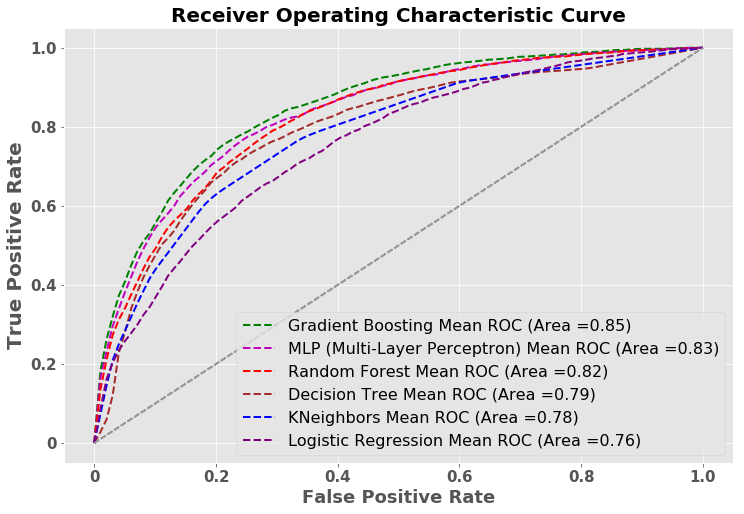

In [40]:
from src.roc import plot_roc

fig, ax = plt.subplots(figsize = (12,8))

plot_roc(X, y, GradientBoostingClassifier, n_estimators=300, plot_name="Gradient Boosting", ax=ax,color="green")
plot_roc(X, y, MLPClassifier, alpha=.01, plot_name="MLP (Multi-Layer Perceptron)", ax=ax,color="m")
plot_roc(X, y, RandomForestClassifier, n_estimators=300, plot_name="Random Forest", ax=ax,color="red")
plot_roc(X, y, DecisionTreeClassifier, max_depth=9, plot_name="Decision Tree", ax=ax,color="brown")
plot_roc(X, y, KNeighborsClassifier, plot_name="KNeighbors", ax=ax,color="blue")
plot_roc(X, y, LogisticRegression, plot_name="Logistic Regression", ax=ax,color="purple")

ax.set_title("Receiver Operating Characteristic Curve", fontsize = 20, weight="bold")
ax.set_xlabel("False Positive Rate", fontsize = 18, weight="bold")
ax.set_ylabel("True Positive Rate", fontsize = 20, weight="bold")
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([0,0.2,0.4,0.6,0.8,1.0], fontsize = 15, weight="bold")
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0], fontsize = 15, weight="bold")


In [12]:
# plot_roc(X, y, GradientBoostingClassifier, n_estimators=300, plot_name="X")

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 7 Text xticklabel objects>)

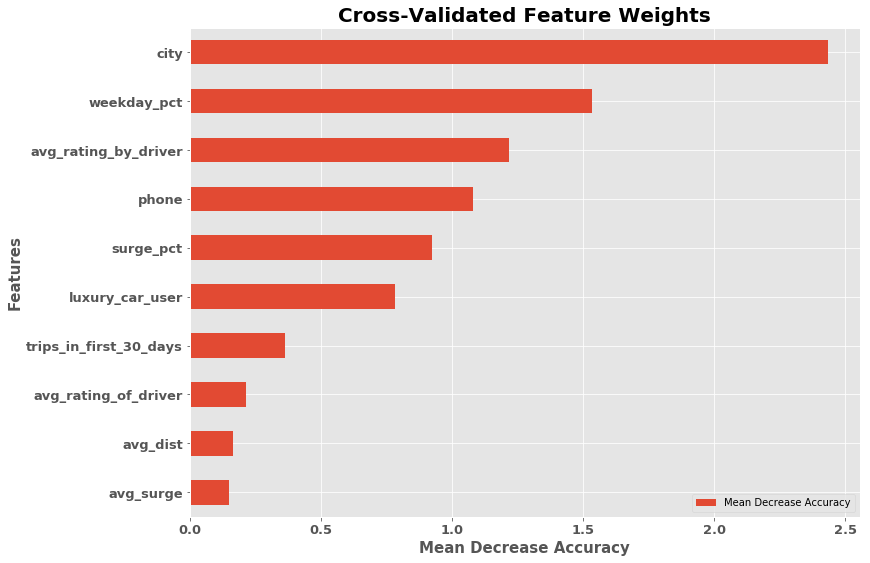

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

names = X.columns
 
rf = GradientBoostingClassifier(n_estimators=30, learning_rate=.74, max_features=4, max_depth=2, random_state=0)
scores = defaultdict(list)
 
# crossvalidate the scores on a number of 
# different random splits of the data
splitter = ShuffleSplit(100, test_size=.3)

for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    rf.fit(X_train, y_train)
    acc = r2_score(y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort_values(by='Mean Decrease Accuracy').plot(kind='barh',figsize=(12,9))
plt.title("Cross-Validated Feature Weights",weight="bold",fontsize=20)
plt.xlabel("Mean Decrease Accuracy",weight="bold",fontsize=15)
plt.ylabel("Features",weight="bold",fontsize=15)
plt.yticks(weight="bold",fontsize=13)
plt.xticks(weight="bold",fontsize=13)


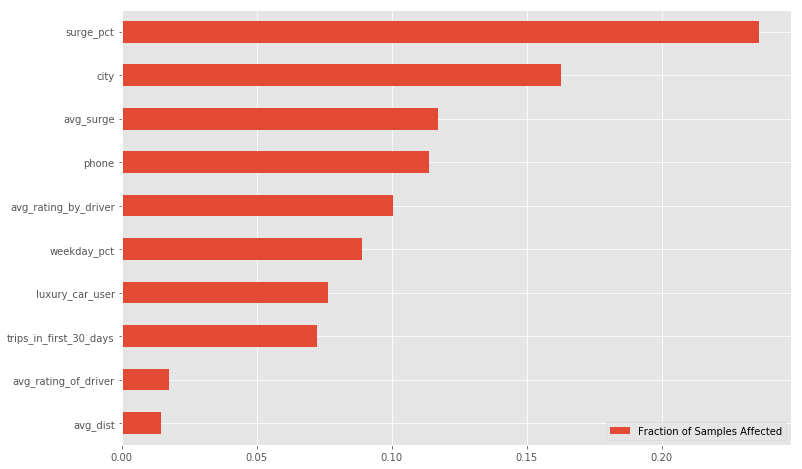

In [223]:
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize = (12,8))

In [165]:
churn_df_test = pd.read_csv('data/churn_test.csv', parse_dates=['last_trip_date','signup_date'])

In [166]:
churn_df_test = clean_churn_data(churn_df_test)

In [167]:
# y = churn_df_test['active_status']
# X = churn_df_test.drop(columns=['active_status'])
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [168]:
# gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=.74, max_features=4, max_depth=2, random_state=1)
# gb_clf.fit(X_train, y_train)
# score_matrix(gb_clf)

Model: GradientBoostingClassifier
precision = 71.43%
recall = 63.35%
accuracy = 76.32%, score = 76.32%


In [41]:

churn_df_test = pd.read_csv('data/churn_test.csv', parse_dates=['last_trip_date','signup_date'])
churn_df_test = clean_churn_data(churn_df_test)
y = churn_df_test['active_status']
X = churn_df_test.drop(columns=['active_status'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
# gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=.74, max_features=4, max_depth=2)
# gb_clf.fit(X_train, y_train)


In [29]:
# score_list = []
# for i in range(10):
#     score_list.append(test_df_Gradient_Boost())
# print(np.mean(score_list))

In [42]:
gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=.74, max_features=4, max_depth=2)
gb_clf.fit(X_train, y_train)
score_matrix(gb_clf)

Model: GradientBoostingClassifier
precision = 72.02%
recall = 64.71%
accuracy = 78.56%, score = 78.56%


0.7856

In [45]:
score_list = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=.74, max_features=4, max_depth=2)
    gb_clf.fit(X_train, y_train)
    score_list.append(score_matrix(gb_clf))

print(np.mean(score_list))

0.7731866666666666


In [54]:
score_list = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    forest = RandomForestClassifier(oob_score=True,n_estimators=300, max_depth = 5,max_features =5)
    forest.fit(X_train,y_train)
    score_list.append(score_matrix(forest))

print(np.mean(score_list))

0.7688266666666667


In [53]:
score_list = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    forest = RandomForestClassifier(oob_score=True,n_estimators=300, max_depth = 5,max_features =4)
    forest.fit(X_train,y_train)
    score_list.append(score_matrix(forest))

print(np.mean(score_list))

0.7666933333333332


In [48]:
score_list = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
    clf.fit(X_train, y_train)
    score_list.append(score_matrix(clf))

print(np.mean(score_list))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


0.6416266666666666


In [39]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
clf.fit(X_train, y_train)
score_matrix(clf)

Model: MLPClassifier
precision = 66.20%
recall = 48.42%
accuracy = 72.96%, score = 72.96%


0.7296